In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, load_digits
from sklearn.datasets import make_circles, make_blobs

from sklearn.manifold import TSNE

In [120]:
def score(est, X, y, label = None):
    print(est.__class__.__name__, f'{label}:\t', est.score(X, y))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa or versicolor or virginica
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


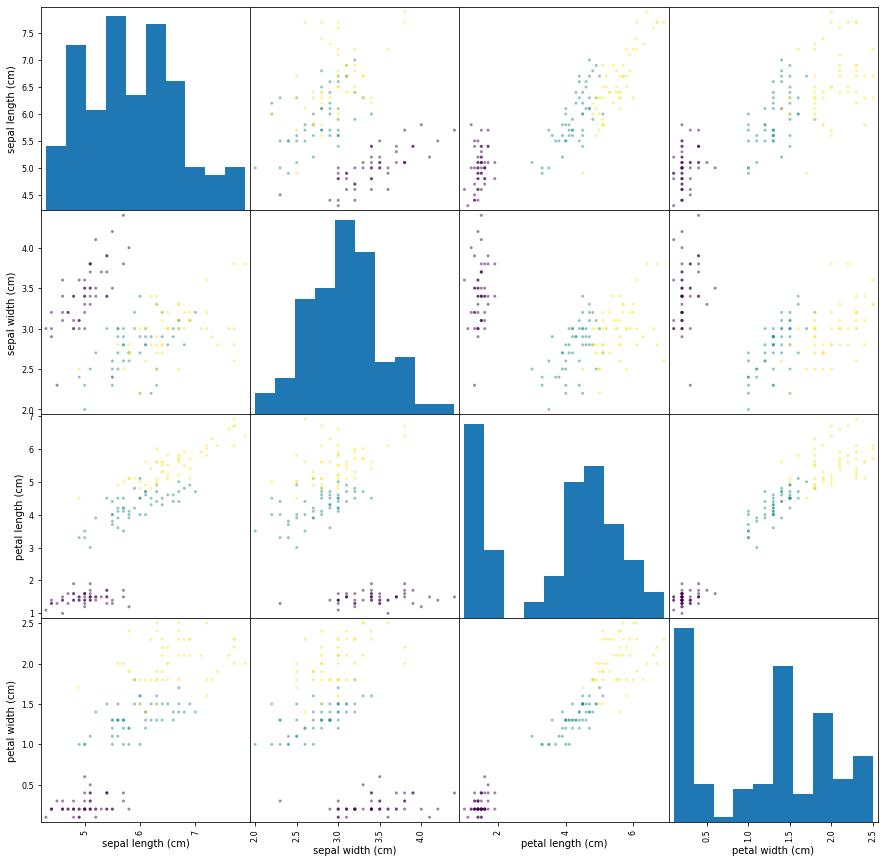

In [242]:
iris = load_iris()

X, y = (iris.data, iris.target)

table_short = pd.DataFrame(data = X, columns = list(iris.feature_names))
table_long = pd.DataFrame(data = np.hstack((X, y.reshape(-1, 1))), columns = list(iris.feature_names) + [' or '.join(iris.target_names)])
display(table_long)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
pd.plotting.scatter_matrix(table_short, c = y, ax = ax)
plt.show()

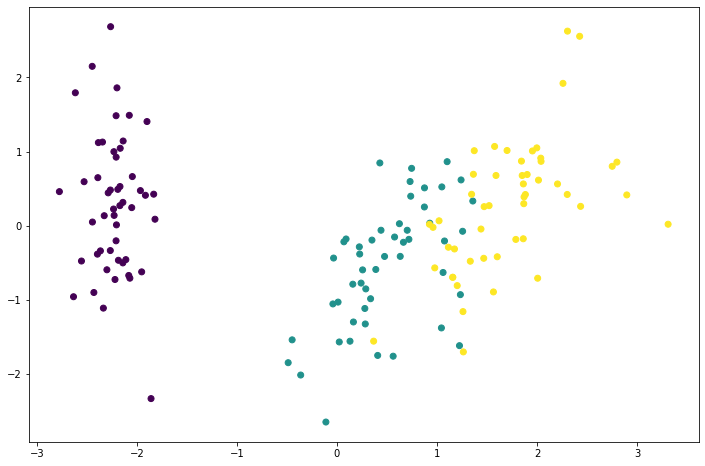

In [122]:
X_scaled = StandardScaler().fit_transform(X)

pca2 = PCA(n_components = 2).fit(X_scaled)
X2 = pca2.transform(X_scaled)

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
plt.scatter(X2[:, 0], X2[:, 1], c = y)
plt.show()

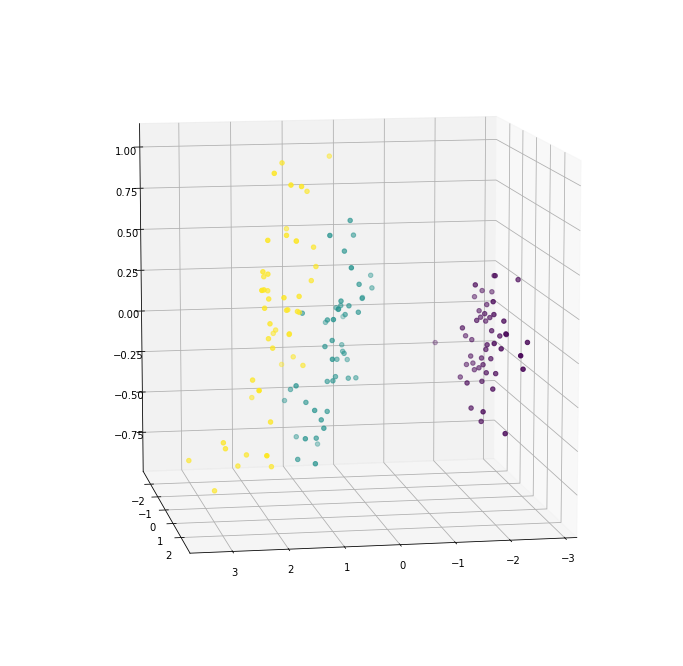

In [123]:
X_scaled = StandardScaler().fit_transform(X)

pca3 = PCA(n_components = 3).fit(X_scaled)
X3 = pca3.transform(X_scaled)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(10, 80)
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c = y)
plt.show()

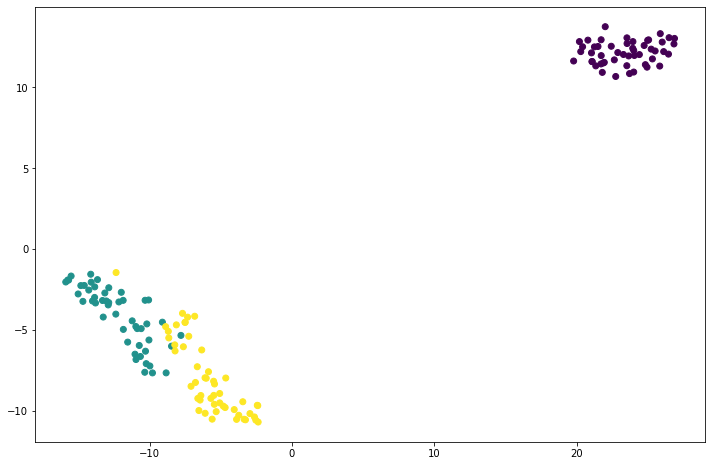

In [128]:
from sklearn.manifold import TSNE

X_tsne = TSNE().fit_transform(X)

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y)
plt.show()

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [130]:
clf_list = [
    DecisionTreeClassifier(),
    LogisticRegression(),
    SGDClassifier(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

table_rows = []

for clf in clf_list:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    train_score, test_score = (clf.score(X_train, y_train), clf.score(X_test, y_test))
    table_rows.append([name, train_score, test_score])
    
columns = ['Learning Algorithm', 'Train', 'Test ']  
table = pd.DataFrame(data = table_rows, columns = columns)

cm = sns.light_palette("lightgreen", as_cmap=True)
table.style.background_gradient(cmap=cm)
# table.style.bar(subset=['Train', 'Test '], color='lightgreen', vmin = 0.9, vmax = 1, width = 100, align = 'left')

,Learning Algorithm,Train,Test
0,DecisionTreeClassifier,1.000000,0.977778
1,LogisticRegression,0.980952,0.977778
2,SGDClassifier,0.952381,0.955556
3,SVC,0.971429,0.977778
4,RandomForestClassifier,1.000000,0.977778
5,GradientBoostingClassifier,1.000000,0.977778


In [154]:
from sklearn.model_selection import cross_val_score

table_rows = []
n_folds = 5

for clf in clf_list:
    scores = cross_val_score(clf, X, y, cv = n_folds)
    name = clf.__class__.__name__
    table_rows.append([name] + list(scores) + [np.mean(scores), np.std(scores)])

columns = ['Learning Algorithm'] + list(np.arange(1, n_folds + 1, 1)) + ['Mean', 'Std']  
table = pd.DataFrame(data = table_rows, columns = columns)

cm_lightgreen = sns.light_palette("lightgreen", as_cmap=True)
cm_green = sns.light_palette("green", as_cmap=True)
cm_orange = sns.light_palette("orange", as_cmap=True)

s = table.style
s = s.background_gradient(subset = columns[1:n_folds + 1], cmap=cm_lightgreen)
s = s.background_gradient(subset = columns[n_folds + 1], cmap=cm_green)
s = s.background_gradient(subset = columns[n_folds + 2], cmap=cm_orange)
display(s)

/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Learning Algorithm,1,2,3,4,5,Mean,Std
0,DecisionTreeClassifier,0.966667,0.966667,0.900000,1.000000,1.000000,0.966667,0.036515
1,LogisticRegression,0.966667,1.000000,0.933333,0.966667,1.000000,0.973333,0.024944
2,SGDClassifier,0.766667,0.800000,0.533333,0.900000,0.666667,0.733333,0.124722
3,SVC,0.966667,0.966667,0.966667,0.933333,1.000000,0.966667,0.021082
4,RandomForestClassifier,0.966667,0.966667,0.933333,0.933333,1.000000,0.960000,0.024944
5,GradientBoostingClassifier,0.966667,0.966667,0.900000,0.966667,1.000000,0.960000,0.032660


In [169]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv = kfold)
print(scores)

[0.96 0.96 0.96]


In [198]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

kfold = LeaveOneOut()
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv = kfold)
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [199]:
print(np.mean(scores), np.std(scores))

0.9533333333333334 0.21092389359408498


In [203]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

kfold = ShuffleSplit(n_splits = 10, train_size = 0.8, test_size = 0.2, random_state = 0)
clf = LogisticRegression(max_iter = 1000)
scores = cross_val_score(clf, X, y, cv = kfold)
print(scores)
print(np.mean(scores), np.std(scores))

[1.         0.96666667 0.93333333 0.96666667 0.96666667 0.96666667
 1.         1.         1.         0.96666667]
0.9766666666666668 0.02134374745810949


In [205]:
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

kfold = StratifiedShuffleSplit(n_splits = 10, train_size = 0.8, test_size = 0.2, random_state = 0)
clf = LogisticRegression(max_iter = 1000)
scores = cross_val_score(clf, X, y, cv = kfold)
print(scores)
print(np.mean(scores), np.std(scores))

[1.         1.         0.96666667 1.         0.96666667 0.93333333
 1.         0.96666667 0.96666667 0.93333333]
0.9733333333333334 0.024944382578492935


In [241]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X_b, y_b = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(clf, X_b, y_b, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.         0.2        0.33333333]


/Users/hadierturk/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


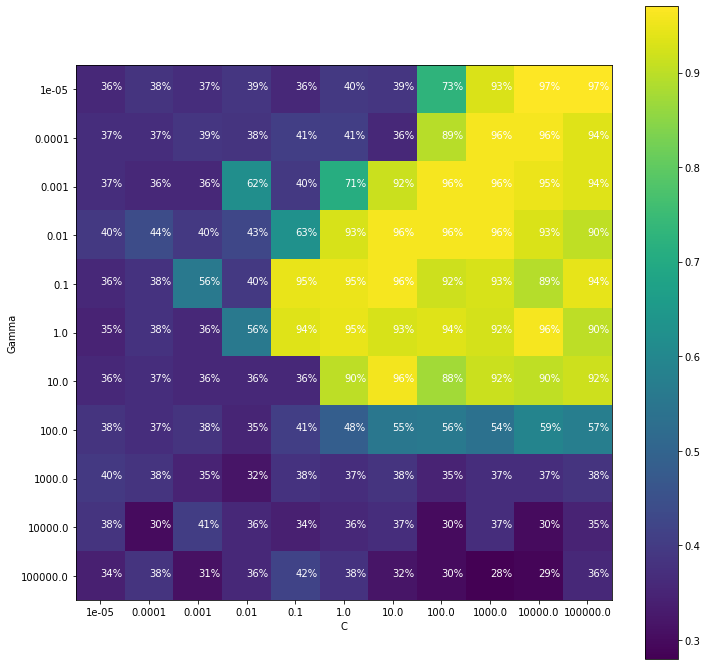

In [347]:
from sklearn.svm import SVC

N = 11
minm = -5
maxm = 5
gamma_list = 10 ** np.linspace(minm, maxm, N)
C_list = 10 ** np.linspace(minm, maxm, N)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

fig, ax = plt.subplots(1, 1, figsize = (12, 12))

score_array = []
for i, gamma in enumerate(gamma_list):
    score_array.append([])
    for j, C in enumerate(C_list):
        clf = SVC(gamma = gamma, C = C)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, random_state = 10 * i + j, test_size = 0.2)
#         score = clf.fit(X_train, y_train).score(X_test, y_test)
        score = np.mean(cross_val_score(clf, X_train2, y_train2, cv = 20))
        score_array[i].append(score)
        ax.text(j, i, str(int(round(score * 100, 0))) + '%', color = 'white')
        
img = ax.imshow(score_array)
plt.colorbar(img)

ax.set_xticks(np.arange(0, N))
ax.set_yticks(np.arange(0, N))
ax.set_xticklabels(gamma_list)
ax.set_yticklabels(C_list)
ax.set_ylabel('Gamma')
ax.set_xlabel('C')

plt.show()

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
print(SVC(gamma = 0.00001, C = 100000).fit(X_train, y_train).score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
print(SVC(gamma = 0.00001, C = 100000).fit(X_train, y_train).score(X_test, y_test))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.3)
print(SVC(gamma = 0.00001, C = 100000).fit(X_train, y_train).score(X_test, y_test))

0.9777777777777777
1.0
1.0


In [302]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': 10 ** np.linspace(minm, maxm, N), 'gamma': 10 ** np.linspace(minm, maxm, N)}

grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid)

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])})

In [330]:
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_estimator_)
table = pd.DataFrame(grid_search.cv_results_)
display(table[70:71])
display(table[100:101])
display(table[80:90])

0.9777777777777777
{'C': 10.0, 'gamma': 0.1}
SVC(C=10.0, gamma=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,0.000387,0.000019,0.000257,0.000014,10,0.1,"{'C': 10.0, 'gamma': 0.1}",1.0,1.0,1.0,0.952381,0.952381,0.980952,0.023328,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
100,0.000432,0.00013,0.000262,0.00003,10000,0.0001,"{'C': 10000.0, 'gamma': 0.0001}",1.0,1.0,1.0,0.952381,0.952381,0.980952,0.023328,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
80,0.000387,0.000019,0.000257,0.000018,100,0.01,"{'C': 100.0, 'gamma': 0.01}",1.000000,1.000000,1.000000,0.952381,0.952381,0.980952,0.023328,1
81,0.000408,0.000025,0.000254,0.000010,100,0.1,"{'C': 100.0, 'gamma': 0.1}",0.952381,1.000000,1.000000,0.857143,0.952381,0.952381,0.052164,13
82,0.000547,0.000165,0.000287,0.000068,100,1,"{'C': 100.0, 'gamma': 1.0}",0.857143,1.000000,1.000000,0.857143,0.952381,0.933333,0.064594,23
83,0.000676,0.000057,0.000295,0.000036,100,10,"{'C': 100.0, 'gamma': 10.0}",0.857143,0.952381,1.000000,0.809524,0.952381,0.914286,0.069985,32
84,0.000756,0.000075,0.000299,0.000022,100,100,"{'C': 100.0, 'gamma': 100.0}",0.523810,0.380952,0.619048,0.571429,0.619048,0.542857,0.088320,43
85,0.000769,0.000055,0.000354,0.000060,100,1000,"{'C': 100.0, 'gamma': 1000.0}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,49
86,0.000720,0.000072,0.000300,0.000029,100,10000,"{'C': 100.0, 'gamma': 10000.0}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,49
87,0.000691,0.000063,0.000286,0.000025,100,100000,"{'C': 100.0, 'gamma': 100000.0}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,49
88,0.000461,0.000022,0.000300,0.000042,1000,1e-05,"{'C': 1000.0, 'gamma': 1e-05}",0.857143,0.952381,1.000000,0.904762,0.904762,0.923810,0.048562,28
89,0.000417,0.000032,0.000264,0.000013,1000,0.0001,"{'C': 1000.0, 'gamma': 0.0001}",0.952381,1.000000,1.000000,0.904762,0.952381,0.961905,0.035635,6


0      0.371429
1      0.371429
2      0.371429
3      0.371429
4      0.371429
         ...   
116    0.914286
117    0.542857
118    0.371429
119    0.371429
120    0.371429
Name: mean_test_score, Length: 121, dtype: float64


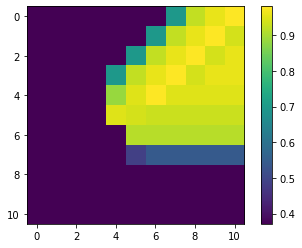

In [345]:
print(table.mean_test_score)
test_score_array = table.mean_test_score.values.reshape(11, 11).T
scores_image = plt.imshow(test_score_array)
plt.colorbar(scores_image)

In [352]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf'], 'C': 10 ** np.linspace(minm, maxm, N), 'gamma': 10 ** np.linspace(minm, maxm, N)},
             {'kernel': ['linear'], 'C': 10 ** np.linspace(minm, maxm, N)}]

grid_search = GridSearchCV(estimator = SVC(), param_grid = param_grid)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                          'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                          'kernel': ['rbf']},
                         {'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                          'kernel': ['linear']}])

In [361]:
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_estimator_)
table = pd.DataFrame(grid_search.cv_results_)
display(table[70:71])
display(table[100:101])
display(table[126:127])
display(table)

0.9777777777777777
{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10.0, gamma=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,0.000476,0.00013,0.000319,0.000086,10,0.1,rbf,"{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}",1.0,1.0,1.0,0.952381,0.952381,0.980952,0.023328,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
100,0.000427,0.000094,0.000271,0.000047,10000,0.0001,rbf,"{'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",1.0,1.0,1.0,0.952381,0.952381,0.980952,0.023328,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
126,0.000402,0.000028,0.000241,0.000004,1,NaN,linear,"{'C': 1.0, 'kernel': 'linear'}",0.952381,1.0,1.0,0.952381,0.952381,0.971429,0.023328,6


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000853,0.000231,0.000461,0.000109,1e-05,1e-05,rbf,"{'C': 1e-05, 'gamma': 1e-05, 'kernel': 'rbf'}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,57
1,0.001102,0.000760,0.000484,0.000133,1e-05,0.0001,rbf,"{'C': 1e-05, 'gamma': 0.0001, 'kernel': 'rbf'}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,57
2,0.001004,0.000502,0.000551,0.000391,1e-05,0.001,rbf,"{'C': 1e-05, 'gamma': 0.001, 'kernel': 'rbf'}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,57
3,0.000635,0.000089,0.000334,0.000034,1e-05,0.01,rbf,"{'C': 1e-05, 'gamma': 0.01, 'kernel': 'rbf'}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,57
4,0.000599,0.000045,0.000297,0.000012,1e-05,0.1,rbf,"{'C': 1e-05, 'gamma': 0.1, 'kernel': 'rbf'}",0.380952,0.333333,0.380952,0.380952,0.380952,0.371429,0.019048,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.000393,0.000012,0.000245,0.000011,10,NaN,linear,"{'C': 10.0, 'kernel': 'linear'}",0.904762,1.000000,1.000000,0.904762,0.952381,0.952381,0.042592,19
128,0.000407,0.000039,0.000239,0.000004,100,NaN,linear,"{'C': 100.0, 'kernel': 'linear'}",0.952381,1.000000,1.000000,0.904762,0.952381,0.961905,0.035635,7
129,0.000424,0.000028,0.000252,0.000022,1000,NaN,linear,"{'C': 1000.0, 'kernel': 'linear'}",0.952381,1.000000,1.000000,0.904762,0.952381,0.961905,0.035635,7
130,0.000399,0.000019,0.000249,0.000021,10000,NaN,linear,"{'C': 10000.0, 'kernel': 'linear'}",0.952381,1.000000,1.000000,0.904762,0.952381,0.961905,0.035635,7


0      0.371429
1      0.371429
2      0.371429
3      0.371429
4      0.371429
         ...   
127    0.952381
128    0.961905
129    0.961905
130    0.961905
131    0.961905
Name: mean_test_score, Length: 132, dtype: float64


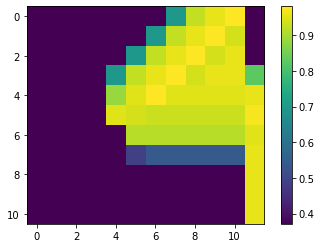

In [357]:
print(table.mean_test_score)
test_score_array = table.mean_test_score.values.reshape(12, 11).T
scores_image = plt.imshow(test_score_array)
plt.colorbar(scores_image)